# <font color=red> Effect of Outliers: </font> Ordinary Least Squares (OLS) Solution & Beyond


The goal of this notebook is to observe the effect of outliers on the OLS method.

Then, we present **two solution approaches** to overcome the effect of outliers:
- Probabilistic Approach: Minimize absolute error loss function (Robust Linear Regression)
- Non-Probabilistic Approach: Minimize a hybrid of squared error and absolute error loss function (Huber loss function)

First, let's briefly discuss why the OLS method is not robust in the presence of outliers in the dataset.

Consider the "squared average" loss function used in the OLS method.

$L(\vec w) = \displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

This squared error loss function arises naturally when we apply the **Maximum Likelihood Estimation (MLE)** approach to estimate the weight vector $\vec w$ by assuming that the target variable y is distributed normally:

$p(y | x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(y - w^T.x)^2}{2\sigma^2}}$

Because of the **Gaussian distribution of the target**, the OLS method (or MLE with Gaussian likelihhod) is not robust to outliers. The Gaussian distribution dies away too quickly (thin tail). Hence, it doesn’t associate any probability to the outliers.


We perform two experients to illustrate the fact that OLS (or MLE with target having Gaussian distribution) doesn't provide a good estimation in presence of outliers.

- Experiment 1: No Outliers
- Experiment 2: Effect of Outliers


For the experimentation, use a small synthetic dataset with 1D feature. 


In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import HuberRegressor, SGDRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

## Experiment 1: No Outliers

Weight Vectors:
 [[4.53683014]
 [3.02040712]]

Mean squared error: 0.10

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.97


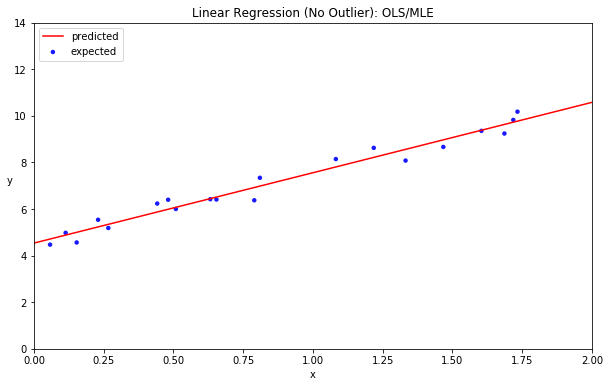

In [2]:
# Linear Regresion: Single Feature using Normal Equation (synthetic data)


np.random.seed(43)

m = 20  # no. of training examples

# Assume that this problem has a 1D feature matrix "X" 
# Create X and y vectors with m training data 
# For this toy problem, we create the training data randomly
# Note: both X and y should be m x 1 vectors

X = 2 *np.random.rand(m,1)

y = 4 + 3*X + np.random.rand(m,1)


# Add a bias term with the feature vector
# The bias term should be 1
X_bias = np.c_[np.ones((m,1)),X]


# Normal Equation closed form solution (OLS) for weight vector w
w = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print("Weight Vectors:\n", w)


# Make prediction 
y_predicted = X_bias.dot(w)


print("\nMean squared error: %.2f"
      % mean_squared_error(y, y_predicted))


# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))



# Plot the predicted line on the training data points (X, y)
# Step 1: define two endpoints on the x-axis
# Step 2: add the bias term: a 2 X 1 dimensional matrix of 1s
# Step 3: find the predicted y-values for these two x points using the theta

X_endpoints = np.array([[0], [2]])
X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
y_endpoints_predicted = X_endpoints_with_ones.dot(w)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X,y,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
plt.xlim(0,2)
plt.ylim(0,14)
plt.title("Linear Regression (No Outlier): OLS/MLE")
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()

## Experiment 2: Effect of Outliers

Weight Vectors:
 [[17.3004916 ]
 [-0.39930011]]

Mean squared error: 651.33

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.00


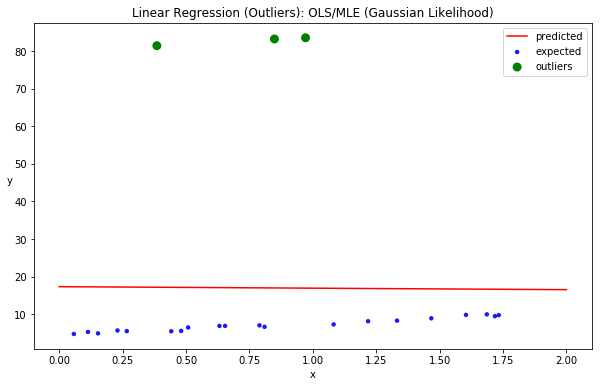

In [6]:
# Linear Regresion: Single Feature using Normal Equation (synthetic data)


np.random.seed(43)

m1 = 20  # no. of training examples
m2 = 3    # no. of outliers

m = m1 + m2

# Assume that this problem has only one feature "X" and a label "y"
# Create X and y vectors with m training data 
# For this Toy problem, we create the training data randomly
# Note: both X and y should be m x 1 vectors
x1 = 2 *np.random.rand(m1,1)

# These are outlier data points
x2 = 1 *np.random.rand(m2,1)


# Mix outliers with the dataset
X = np.concatenate((x1, x2), axis=0)


y1 = 4 + 3*x1 + np.random.rand(m1,1)
y2 = 80 + 3*x2 + np.random.rand(m2,1)

y = np.concatenate((y1, y2), axis=0)



# Add a bias term with the feature vector
# The bias term should be 1
X_bias = np.c_[np.ones((m,1)),X]


# Normal Equation closed form solution for weight vector w
w = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print("Weight Vectors:\n", w)


# Make prediction 
y_predicted = X_bias.dot(w)


print("\nMean squared error: %.2f"
      % mean_squared_error(y, y_predicted))


# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))



# Plot the predicted line on the training data points (X, y)
# Step 1: define two endpoints on the x-axis
# Step 2: add the bias term: a 2 X 1 dimensonal matrix of 1s
# Step 3: find the predicted y-values for these two x points using the theta

X_endpoints = np.array([[0], [2]])
X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
y_endpoints_predicted = X_endpoints_with_ones.dot(w)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(x1,y1,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(x2,y2,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression (Outliers): OLS/MLE (Gaussian Likelihood)")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()


# Observation 


We observe that in the presence of outliers in our data, the result (red) is a poor fit.

This is because the MLE squared error penalizes deviations **quadratically**.

$ \vec w_{MLE} = argmin_{\vec w}\displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

At the heart of the current problem lies the fact that our data likelihood (conditional distribution of the target given the feature) dies away too quickly (because it’s a Gaussian!). Hence, it doesn’t associate any probability to the outliers.

Our model is not robust to the outliers.

How do we fix this issue?



## Overcoming the Effect of Outliers

We present **two solution approaches** to overcome the effect of outliers:
- Probabilistic Approach: Minimize absolute error loss function (Robust Linear Regression)
- Non-Probabilistic Approach: Minimize a hybrid of squared error and absolute error loss function (Huber loss function)

## Solution Approach 1: Probabilistic Approach - Robust Linear Regression

Counter intuitively, let’s assume that there may exist some outliers in our model. Then, use a different distribution that adds probability to the outliers. This distribution should have **heavy tails** (unlike the Gaussian distribution) to accommodate outliers.

One way to achieve robustness to outliers is to replace the Gaussian distribution for the response variable with a distribution that has heavy tails. Such a distribution will assign higher likelihood to outliers.

One possibility is to use the **Laplace distribution**. It is also known as the double-sided exponential distribution. 
Note that the Laplace distribution dies slowly. 

After using the Laplace likehood, the minimization problem (loss function) becomes:

$ \vec w_{MLE-Laplace} = argmin_{\vec w}\displaystyle\sum_{i=1}^{n} |y_i - \vec w^T.\vec x_i|$

Here, the MLE (Laplace) loss function is:

$L_{MLE-Laplace}(\vec w) = \displaystyle\sum_{i=1}^{n} |y_i - \vec w^T.\vec x_i|$

Hence, Laplace likelihood is equal to the least absolute error (not squared error)! Here we are **penalizing less** for making a mistake. Previously the penalty was large due to the quadratic term.

Thus, we are paying less penalty for the outliers.

Now compare this loss function with the squared error loss function of the MLE (Gaussian) approach.

$L_{MLE-Gaussian}(\vec w) = \displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

Notice that the robustness arises from the use of $|y_i - \vec w^t. \vec x_i|$ instead of $(y_i - \vec w^t. \vec x_i)^2$.


### Implementation Issue With the Laplace Likehood Based MLE
Unfortunately, the Laplace loss (negative log-likelihood) function is a **non-linear objective function**, which is hard to optimize. We need to convert it to a linear objective, subject to linear constraints, and use a **Linear Program (LP)** solver to find optimal $w$.




## Solution Approach 2: Non-Probabilistic Approach - Minimize a hybrid of squared error and absolute error loss function (Huber loss function)


An alternative to using Laplace distribution for the likelihood of the data in the presence of outliers, we can use a **non-probabilistic** approach in which we construct a **new loss function** combining the two loss functions that we derived previously using the probabilistic approach.
- Squared error loss function (due to Gaussian likelihood)
- Absolute error loss function (due to Laplace likelihood)

Recall that due to the presence of outliers the squared error loss function penalizes deviations **quadratically** resulting poor line-fitting. In that case we should use absolute error loss function. 

This observation leads us to construct a new loss function that is quadratic for small values of error, and linear for large value. More specifically, it behaves like a squared error loss function when the error (absolute) is less than a small value ($\epsilon$), otherwise it uses the absolute error loss function.

This new function is known as the **Huber loss** function.

$L_H(r, \epsilon) =
  \begin{cases}
    r^2/2       & \quad \text{if } |r| \leq \epsilon\\
    \epsilon|r| - \epsilon^2/2  & \quad \text{if } |r| > \epsilon
  \end{cases}$

Here, $r = y_i - \vec w^t. \vec x_i$

This loss function is equivalent to $l_2$ for errors that are smaller than $\epsilon$, and is equivalent to $l_1$ for larger errors.

Optimizing the Huber loss is **much faster** than using the Laplace likelihood, since we can use standard smooth optimization methods (such as quasi-Newton) instead of linear programming. The results are qualitatively similar to the probabilistic methods.

Below we implement Scikit-Learn's **HuberRegressor** model that is robust to outliers.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html


The HuberRegressor applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It does not ignore the effect of the outliers but gives a lesser weight to them.

The key hyperparameter for the HuberRegressor model is:

- epsilon : float, greater than 1.0, default 1.35
        
        The parameter epsilon controls the number of samples that should be classified as outliers. The smaller the epsilon, the more robust it is to outliers.

Huber Score:  -0.15266824063908713

Mean squared error: 750.82

Coefficient of determination r^2 variance score [1 is perfect prediction]: -0.15


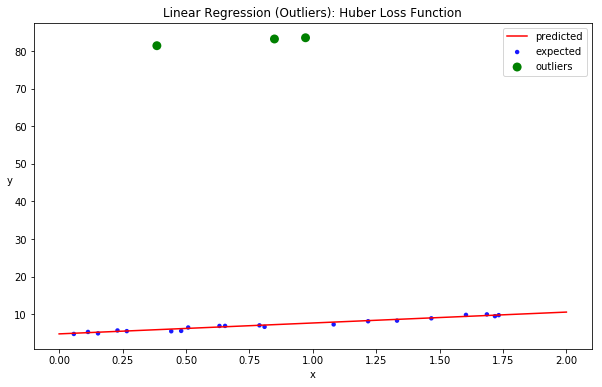

In [8]:
# Robust Linear Regression using Huber Loss Function

# We need to flatten the 1D target vector into a 1D array for fitiing the HuberRegressor
y = y.ravel()



# Create HuberRegressor object and fit the data
huber = HuberRegressor()
huber.fit(X, y)



print("Huber Score: ", huber.score(X, y))


# Make prediction 
y_predicted = huber.predict(X)


print("\nMean squared error: %.2f"
      % mean_squared_error(y, y_predicted))


# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))



# Plot the predicted line on the training data points (X, y)
# Step 1: define two endpoints on the x-axis
# Step 2: add the bias term: a 2 X 1 dimensonal matrix of 1s
# Step 3: find the predicted y-values for these two x points using the theta

X_endpoints = np.array([[0], [2]])
# X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
# y_endpoints_predicted = X_endpoints_with_ones.dot(w)

y_endpoints_predicted = huber.predict(X_endpoints)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(x1,y1,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(x2,y2,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression (Outliers): Huber Loss Function")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()


## Overcoming the Effect of Outliers With the Gradient Descent Approach

When we apply a Gradient Descent (GD) based approach to solve a Linear Regression problem in the presence of outliers, we need to use the **huber loss** function, instead of the squared loss function. Also, we can use the **epsilon insensitive** loss function that ignores errors less than epsilon and is linear past that. 

Below we implement the **Stochastic Gradient Descent (SGD)** approach.

The key hyperparameter for the SGDRegressor model is:

- loss : str, default: ‘squared_loss’. The loss function to be used. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’

    -- ‘squared_loss’ refers to the ordinary least squares fit. 
    
    -- ‘huber’ modifies ‘squared_loss’ to focus less on getting outliers correct by switching from squared to linear loss past a distance of epsilon. 
    
    -- ‘epsilon_insensitive’ ignores errors less than epsilon and is linear past that.
    
    -- ‘squared_epsilon_insensitive’ is the same but becomes squared loss past a tolerance of epsilon.
    
    
### Note:
We observe that SGD is **not robust** to outliers when the following two loss functions are used.
- ‘squared_loss’
- ‘squared_epsilon_insensitive’

However, SGD is robust to outliers when we use:
- 'huber'
- ‘epsilon_insensitive’


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    2.1s finished


Best Score (negative mean squared error): -741.707108
Optimal Hyperparameter Values:  {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 1000, 'eta0': 0.0001}



----------------------------- Model Evaluation -----------------------------
Mean squared error: 748.67
Coefficient of determination r^2 variance score [1 is perfect prediction]: -0.15


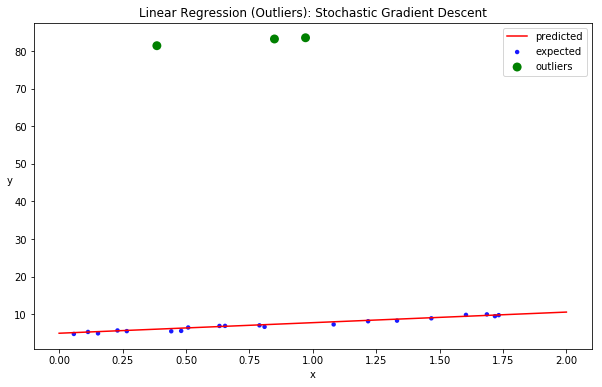

In [5]:
warnings.filterwarnings('ignore')


# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal", "invscaling"], 
#              'max_iter':[100, 400, 1000, 10000],'eta0': [0.01, 0.001, 0.0001],
#               'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal", "invscaling"], 
             'max_iter':[100, 400, 1000, 10000],'eta0': [0.01, 0.001, 0.0001],
              'loss': ['huber']}


sgd = SGDRegressor()

sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
sgd_cv.fit(X, y)


params_optimal_sgd = sgd_cv.best_params_

print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")


# SGD Regression

# Create SGDRegressor linear regression object using the optimal hyperparameter values
lin_reg_sgd = SGDRegressor(**params_optimal_sgd)


# Train the model
lin_reg_sgd.fit(X, y)



print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_sgd = lin_reg_sgd.predict(X)


print("Mean squared error: %.2f"
      % mean_squared_error(y, y_train_predicted_sgd))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y, y_train_predicted_sgd))


X_endpoints = np.array([[0], [2]])
# X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
# y_endpoints_predicted = X_endpoints_with_ones.dot(w)

y_endpoints_predicted = lin_reg_sgd.predict(X_endpoints)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(x1,y1,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(x2,y2,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression (Outliers): Stochastic Gradient Descent")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()
